# Distribuição t-Student

## Definição

Uma variável aleatória contínua $X$ tem distribuição $ t $ de Student com $\nu$ graus de liberdade se sua função densidade de probabilidade é dada por: 

$$
    f(x) = \frac{\Gamma \left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu\pi} \Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{x²}{\nu}\right)^{-\left( \frac{\nu + 1}{2} \right)} , x \in (-\infty, + \infty)
$$

Utilizamos a notação $ X \sim t_\nu$

## Proprieddes
- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

## Teorema principal:

Condisere $X_1, ... , X_n$ variáveis aleatórias independentes e com distribuição normal com média $\mu $ e desvio padrão $\sigma$. Então a variável

$$
    t = \frac {\bar X - \mu}{s/\sqrt(n)}
$$

In [7]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Calculation first moments
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
print(mean, var, skew, kurt)

0.0 3.7027027027027017 nan inf


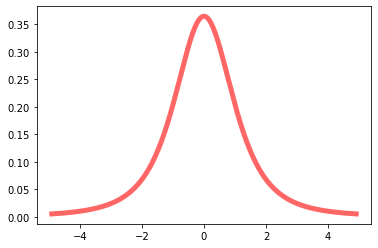

In [46]:
# Display de Probability density funcion (pdf)
x = np.linspace(t.ppf(0.01,df), t.ppf(0.99, df), 1000)
plt.plot(x, t.pdf(x,df), 'r-', lw=5, alpha=0.6, label='t pdf')

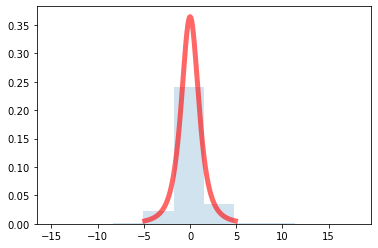

In [47]:
# Generate Random numbers and compare with ppf

r = t.rvs(df, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.plot(x, t.pdf(x,df), 'r-', lw=5, alpha=0.6, label='t pdf')

## Distribuição deslocalda:

A distribuição T pode ser deslocada através dos parametros `loc` e `scale`, de modo que a distribuição `t.pdf(x, df, loc, scale)` é equivalente a dristiuição `t.pdf(y, df) / scale ` with `y = (x - loc) / scale`

$$
    Y = \frac{X - loc}{scale}
$$

# Distribuição T-Student Não Central

Generalização da distribuição $t$ de Student. Utilizada em inferência para análise de poder (Teste T). 

Sejam $Z \sim N(\lambda,1)$ e $U \sim \chi_n²$  com Z e U independente. Então

$$
    t_{n,\lambda} \sim \frac{Z}{\sqrt{\frac{U}{n}}}
$$

tem ditribuição $t$ não central com parâmetro de não centralidade $\lambda$.

In [48]:
from scipy.stats import nct

df, nc = 2.74, 10
mean, var, skew, kurt = nct.stats(df,nc, moments='mvsk')
print(mean, var, skew, kurt)

14.399591720882807 166.6247312448562 nan nan


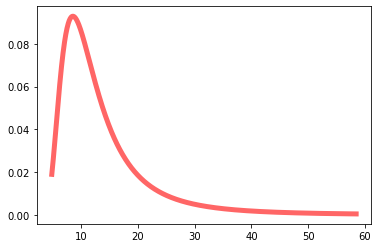

In [49]:
# Display de Probability density funcion (pdf)
x = np.linspace(nct.ppf(0.01, df, nc), nct.ppf(0.99, df, nc), 1000)
plt.plot(x, nct.pdf(x,df, nc), 'r-', lw=5, alpha=0.6, label='nct pdf')

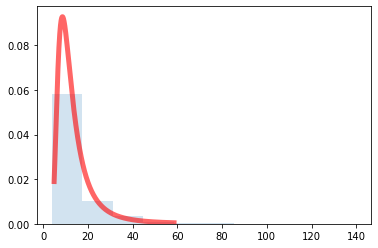

In [50]:
# Generate Random Values and compare
r = nct.rvs(df,nc,size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.plot(x, nct.pdf(x,df, nc), 'r-', lw=5, alpha=0.6, label='nct pdf')

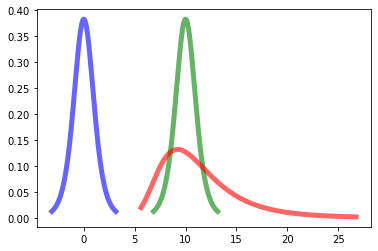

In [51]:
# Comparing the NCT ditribution with the loc parameter for t dist.

n=1000

df = 6
nc = 10

rv_t = t(df)
rv_t_loc = t(df, loc=nc)
rv_nct = nct(df, nc)

x_t = np.linspace(rv_t.ppf(0.01), rv_t.ppf(0.99), n)
x_t_loc = np.linspace(rv_t_loc.ppf(0.01),rv_t_loc.ppf(0.99), n)
x_nct = np.linspace(rv_nct.ppf(0.01), rv_nct.ppf(0.99), 1000)

plt.plot(x_t, rv_t.pdf(x_t), 'b-', lw=5, alpha=0.6, label='t pdf')
plt.plot(x_t_loc, rv_t_loc.pdf(x_t_loc), 'g-', lw=5, alpha=0.6, label='t-loc pdf')
plt.plot(x_nct, rv_nct.pdf(x_nct), 'r-', lw=5, alpha=0.6, label='nct pdf')
